In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [148]:
df=pd.read_csv(r"E:\fliprobo technologies\projects\dataset4_main_medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis (EDA)

In [149]:
print('total rows',df.shape[0])
print('total columns',df.shape[1])

total rows 1338
total columns 7


In [150]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## checking duplicates

In [151]:
df.duplicated().sum()

1

In [152]:
duplicate_rows=df[df.duplicated(keep=False)]
duplicate_rows

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


# dropping duplicates

In [153]:
df.drop_duplicates(subset=None,keep='first',inplace=True,ignore_index=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [154]:
df.duplicated().sum()

0

In [127]:
print('total rows',df.shape[0])
print('total columns',df.shape[1])

total rows 1337
total columns 7


we have to predict the medical cost insurance charges, so charges column is our target and remaining columns are our features

# checking Null values

In [155]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there are no null values in the dataset

# checking datatype of the columns

In [156]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Age, children have int datatype  
and bmi,charges have float datatype  
sex,smoker,region have object datatype 

our Target have continous data so this a regression problem

In [157]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


all details are same as we checked earlier

# checking total unique values in each column

In [158]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

there are 2 unique values in sex that is male and female and in smoker yes and no    
region column have 4 unique values  

# graphical analysis

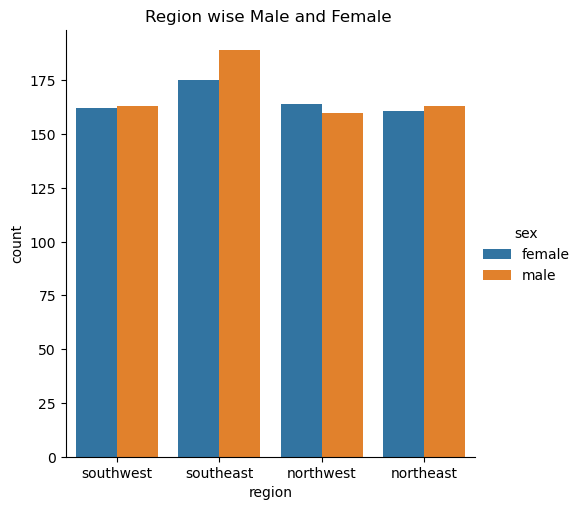

In [132]:
sns.catplot(x="region",hue='sex',kind='count',data=df)
plt.title("Region wise Male and Female ")
plt.show()

in every region count of male and female almost equal

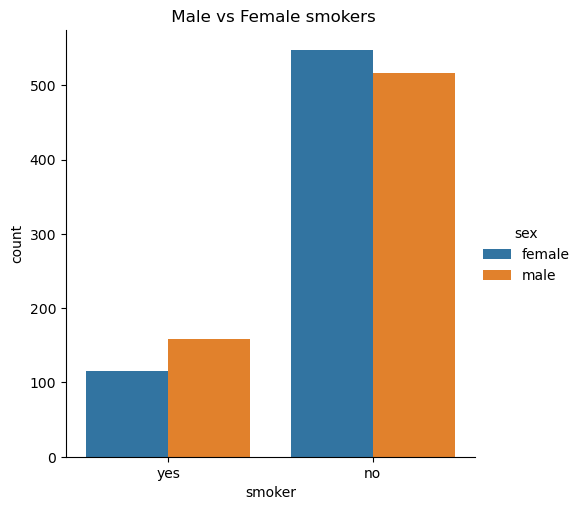

In [133]:
sns.catplot(x="smoker",hue='sex',kind='count',data=df)
plt.title(" Male vs Female smokers")
plt.show()

smokers are very less than nonsmokers

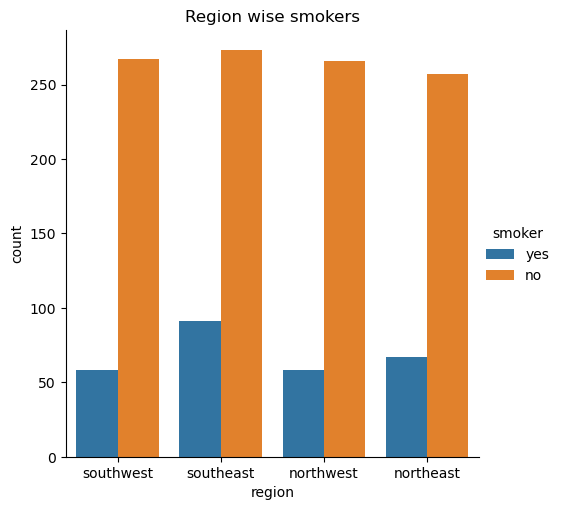

In [134]:
sns.catplot(x="region",hue='smoker',kind='count',data=df)
plt.title("Region wise smokers")
plt.show()

in every region person who are smoking are less than nonsmokers, in southeast region smokers are more than other regions

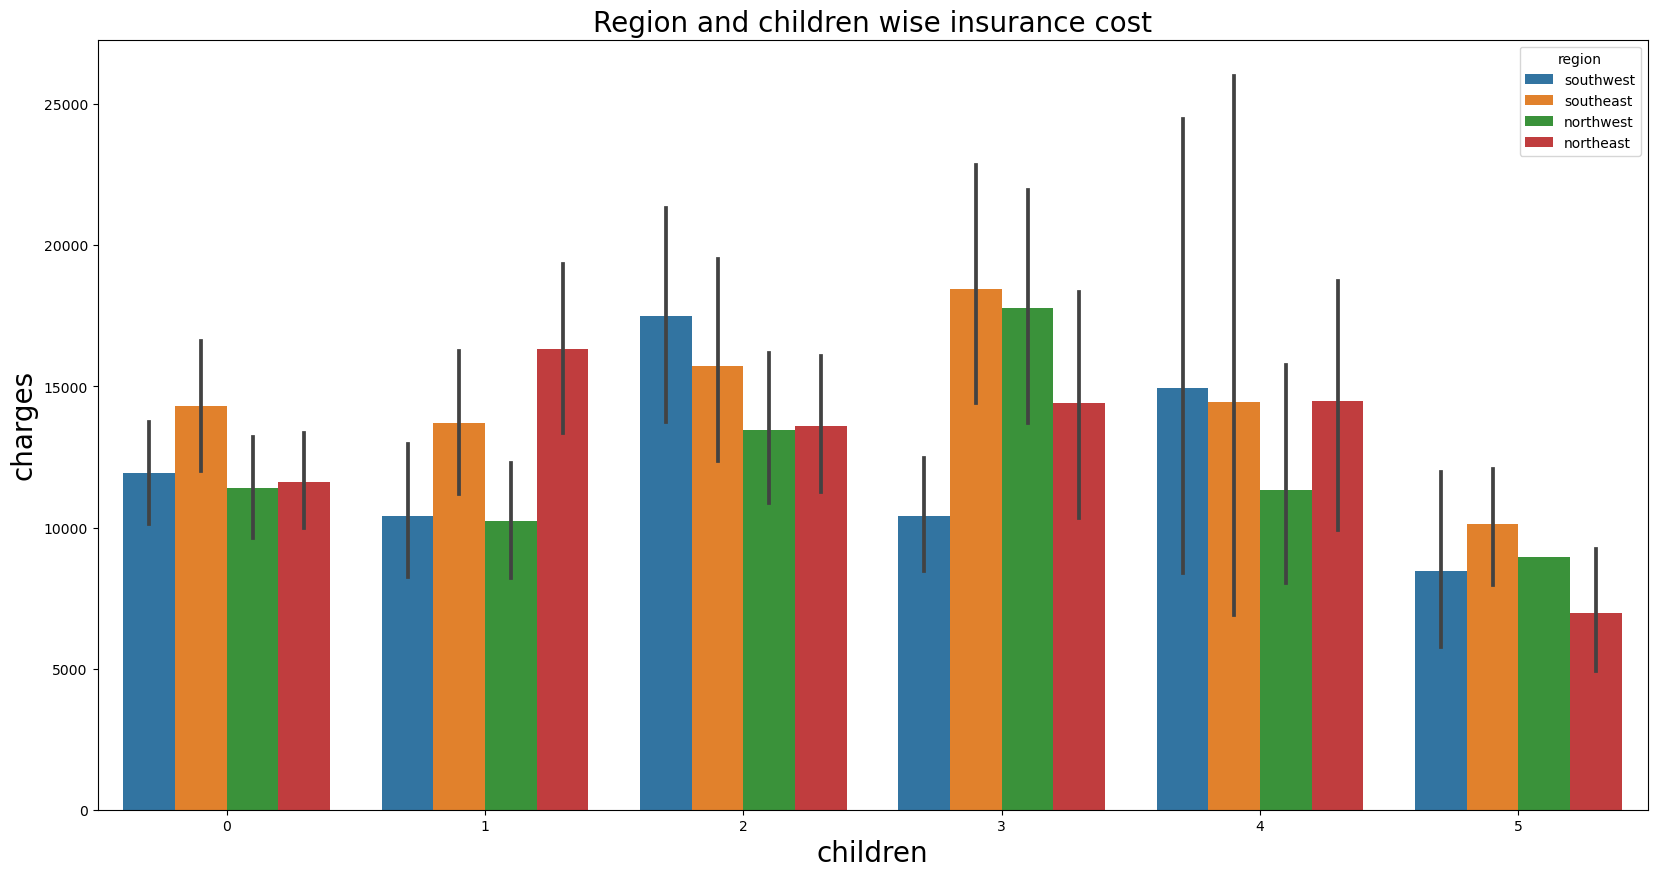

In [135]:
plt.figure(figsize=(20,10))
sns.barplot(x="children",y='charges',hue='region',data=df)
plt.xlabel("children",fontsize=20)
plt.ylabel("charges",fontsize=20)
plt.title("Region and children wise insurance cost",fontsize=20)
plt.show()

in southeast region family not having children and family have 3,5 children have more insurance cost  
in northeast region family having 1 children have more insurance cost  
in southwest region family having 2 and 4 children have more insurance cost  

# Description of Dataset

In [159]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


The counts of all the columns are same which means there are no missing values in the dataset.  
mean and  median(50%) are equal in all columns so there is no skewness in any column, charges is our target so we dont check skewness of that   

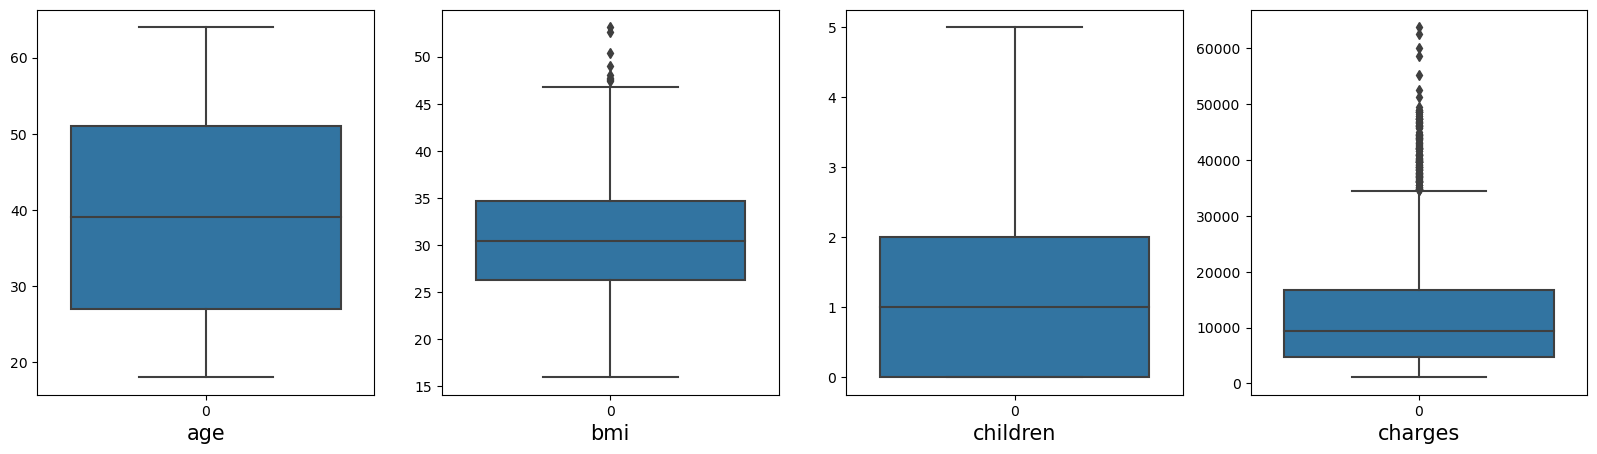

In [160]:
# checking outliers by boxplot
plt.figure(figsize=(20,5))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=8:
            plt.subplot(1,4,plot)
            sns.boxplot(data=df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()    

there are no outliers present

# checking distribution

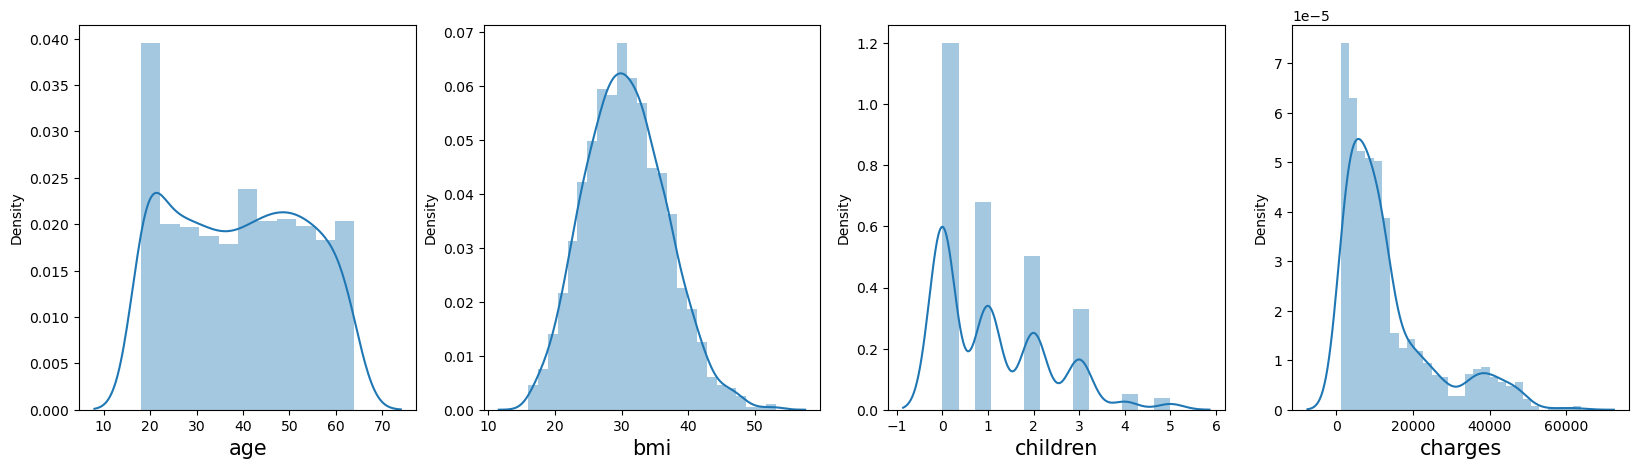

In [161]:
plt.figure(figsize=(20,5))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=8:
            plt.subplot(1,4,plot)
            sns.distplot(df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()    

there is some skewness in children column

In [162]:
# checking skewness
for col in df:
    if df.dtypes[col] !="object":
        print(df[col].skew(),col)

0.054780773126998195 age
0.28391419385321137 bmi
0.9374206440474123 children
1.5153909108403483 charges


In [163]:
df['children']=np.sqrt(df['children'])

In [164]:
for col in df:
    if df.dtypes[col] !="object":
        print(df[col].skew(),col)

0.054780773126998195 age
0.28391419385321137 bmi
0.11497344374436258 children
1.5153909108403483 charges


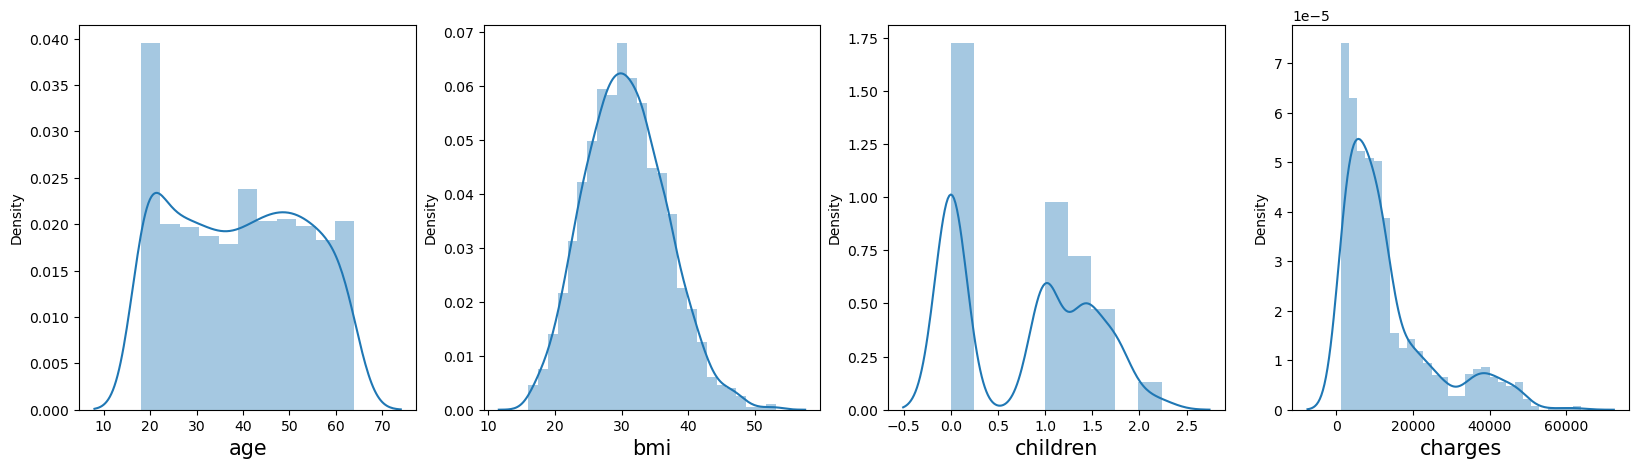

In [165]:
plt.figure(figsize=(20,5))
plot=1
for i in df:
    if df1.dtypes[i] !='object':
        if plot<=8:
            plt.subplot(1,4,plot)
            sns.distplot(df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()    

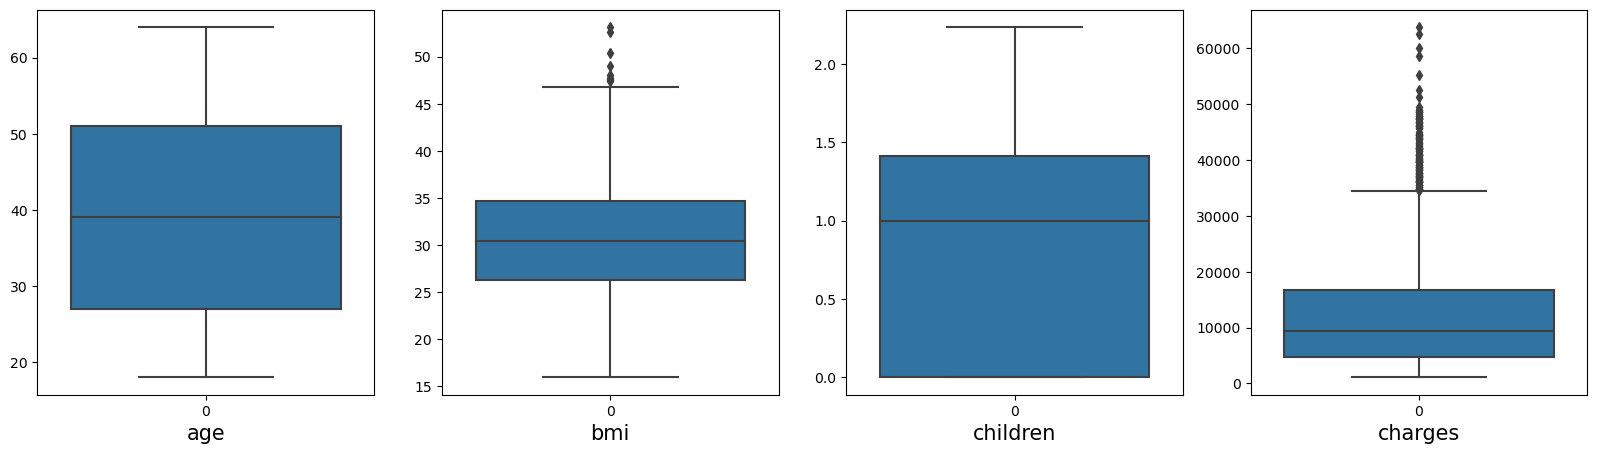

In [166]:
plt.figure(figsize=(20,5))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=8:
            plt.subplot(1,4,plot)
            sns.boxplot(data=df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()    

# Encoding categorical columns

In [167]:
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df      

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0.000000,1.0,3.0,16884.92400
1,18,1.0,33.770,1.000000,0.0,2.0,1725.55230
2,28,1.0,33.000,1.732051,0.0,2.0,4449.46200
3,33,1.0,22.705,0.000000,0.0,1.0,21984.47061
4,32,1.0,28.880,0.000000,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1332,50,1.0,30.970,1.732051,0.0,1.0,10600.54830
1333,18,0.0,31.920,0.000000,0.0,0.0,2205.98080
1334,18,0.0,36.850,0.000000,0.0,2.0,1629.83350
1335,21,0.0,25.800,0.000000,0.0,3.0,2007.94500


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   float64
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1337 non-null   float64
 5   region    1337 non-null   float64
 6   charges   1337 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 73.2 KB


we have converted, the categorical columns into numerical columns using OrdinalEncoding method

In [169]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,0.767085,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,0.712529,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,1.414214,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,2.236068,1.000000,3.000000,63770.428010


After Encoding the categorical columns we can see all the column details here.the counts of all the column are same

# correlation between target variable and independent variables.

In [170]:
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.047281,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017353,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.016049,0.003746,0.157574,0.198401
children,0.047281,0.017353,0.016049,1.000000,0.011411,0.014137,0.073197
smoker,-0.025587,0.076596,0.003746,0.011411,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.014137,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.073197,0.787234,-0.006547,1.000000


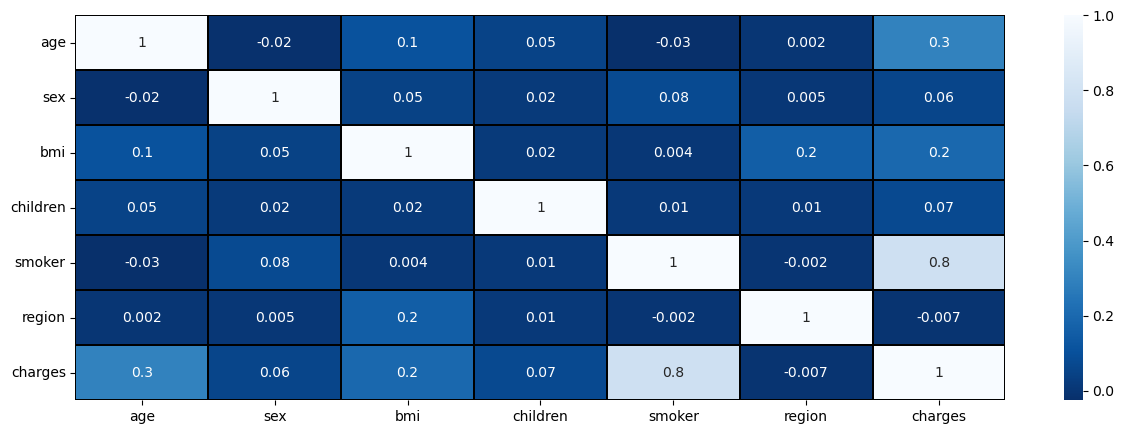

In [174]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor='black',annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

only smoker column has high correlation with target

In [175]:
df.corr().charges.sort_values()

region     -0.006547
sex         0.058044
children    0.073197
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

we found positive and negative correlations, only smoker column has high correlation with target

# seperating features and label

In [176]:
x=df.drop("charges",axis=1)
y=df["charges"]

# Feature Scaling using Standard Scalarization

In [177]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440418,-1.009771,-0.453160,-1.076970,1.969660,1.343163
1,-1.511647,0.990324,0.509422,0.327008,-0.507702,0.438017
2,-0.799350,0.990324,0.383155,1.354790,-0.507702,0.438017
3,-0.443201,0.990324,-1.305052,-1.076970,-0.507702,-0.467128
4,-0.514431,0.990324,-0.292456,-1.076970,-0.507702,-0.467128
...,...,...,...,...,...,...
1332,0.767704,0.990324,0.050269,1.354790,-0.507702,-0.467128
1333,-1.511647,-1.009771,0.206053,-1.076970,-0.507702,-1.372274
1334,-1.511647,-1.009771,1.014490,-1.076970,-0.507702,0.438017
1335,-1.297958,-1.009771,-0.797524,-1.076970,-0.507702,1.343163


# Checking variance inflation factor

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.015812,age
1,1.008893,sex
2,1.040675,bmi
3,1.002964,children
4,1.006635,smoker
5,1.025902,region


there is no multicollinearity

# Modelling

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [181]:
maxAccu=0        
maxRS=0           
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Maximum r2 score is",maxAccu,"on random_state",maxRS)   

 Maximum r2 score is 0.7998789809943334 on random_state 113


# creating train test split

In [182]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor

In [190]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_lr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_lr))
print("Mean squared error:",mean_squared_error(y_test,pred_lr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.7998789809943334
R2_score on training Data: 72.55128379274123
Mean absolute error: 3897.9137815152176
Mean squared error: 31796080.154415235
Root Mean absolute error: 5638.80130474689


In [191]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rfr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rfr))
print("Mean squared error:",mean_squared_error(y_test,pred_rfr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.8723919256082289
R2_score on training Data: 97.52623314637347
Mean absolute error: 2650.619172117776
Mean squared error: 20274914.55855743
Root Mean absolute error: 4502.767433318917


In [199]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score:",r2_score(y_test,pred_knn))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_knn))
print("Mean squared error:",mean_squared_error(y_test,pred_knn))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.8282939401662446
R2_score on training Data: 86.10641429359048
Mean absolute error: 3333.6622790522392
Mean squared error: 27281390.373683397
Root Mean absolute error: 5223.159041584259


In [201]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_gbr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_gbr))
print("Mean squared error:",mean_squared_error(y_test,pred_gbr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2 score: 0.8865018992914893
R2_score on training Data: 89.43315824537429
Mean absolute error: 2389.9362480780683
Mean squared error: 18033061.821454722
Root Mean absolute error: 4246.535272602209


In [202]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_dtr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_dtr))
print("Mean squared error:",mean_squared_error(y_test,pred_dtr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score: 0.7611557730998133
R2_score on training Data: 99.86117415453519
Mean absolute error: 2852.898418741294
Mean squared error: 37948588.41250773
Root Mean absolute error: 6160.242561174659


In [203]:
Lasso=Lasso()
Lasso.fit(x_train,y_train)
pred_Lasso=Lasso.predict(x_test)
pred_train=Lasso.predict(x_train)
print("R2 score:",r2_score(y_test,pred_Lasso))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_Lasso))
print("Mean squared error:",mean_squared_error(y_test,pred_Lasso))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_Lasso)))

R2 score: 0.7998556470046345
R2_score on training Data: 72.55127924427818
Mean absolute error: 3897.953365446218
Mean squared error: 31799787.558117624
Root Mean absolute error: 5639.130035574426


In [204]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rd))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rd))
print("Mean squared error:",mean_squared_error(y_test,pred_rd))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score: 0.7997719833740767
R2_score on training Data: 72.55119559749652
Mean absolute error: 3900.0774389797966
Mean squared error: 31813080.39220594
Root Mean absolute error: 5640.30853696905


In [205]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_svr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_svr))
print("Mean squared error:",mean_squared_error(y_test,pred_svr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 score: -0.10953818462185771
R2_score on training Data: -8.966366464184938
Mean absolute error: 8628.37628896334
Mean squared error: 176288154.17745805
Root Mean absolute error: 13277.354939047838


In [206]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_etr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_etr))
print("Mean squared error:",mean_squared_error(y_test,pred_etr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 score: 0.857449187789111
R2_score on training Data: 99.86117415453519
Mean absolute error: 2616.256964436319
Mean squared error: 22649080.409719884
Root Mean absolute error: 4759.1050009135


In [207]:
from sklearn.model_selection import cross_val_score

In [210]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_lr)-score.mean())*100)

[0.76102297 0.70761078 0.77770446 0.7344626  0.75415204]
0.7469905677938591
Difference between R2 score and cross validation score is 5.288841320047433


In [211]:
score1=cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rfr)-score.mean())*100)

[0.84774404 0.77333335 0.8694412  0.83009477 0.85709498]
0.8355416698065277
Difference between R2 score and cross validation score is -0.7247729640283085


In [212]:
score2=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_knn)-score.mean())*100)

[0.84774404 0.77333335 0.8694412  0.83009477 0.85709498]
0.8355416698065277
Difference between R2 score and cross validation score is -0.7247729640283085


In [213]:
score3=cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_gbr)-score.mean())*100)

[0.84774404 0.77333335 0.8694412  0.83009477 0.85709498]
0.8355416698065277
Difference between R2 score and cross validation score is 5.096022948496159


In [214]:
score4=cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_dtr)-score.mean())*100)

[0.84774404 0.77333335 0.8694412  0.83009477 0.85709498]
0.8355416698065277
Difference between R2 score and cross validation score is -7.438589670671436


In [216]:
score5=cross_val_score(Lasso,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_Lasso)-score.mean())*100)

[0.84774404 0.77333335 0.8694412  0.83009477 0.85709498]
0.8355416698065277
Difference between R2 score and cross validation score is -3.5686022801893147


In [219]:
score6=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rd)-score.mean())*100)

[0.76103216 0.70772117 0.77758472 0.73451861 0.7541246 ]
0.7469962502787122
Difference between R2 score and cross validation score is 5.277573309536454


In [220]:
score7=cross_val_score(svr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_svr)-score.mean())*100)

[0.76103216 0.70772117 0.77758472 0.73451861 0.7541246 ]
0.7469962502787122
Difference between R2 score and cross validation score is -85.65344349005699


In [221]:
score8=cross_val_score(etr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_etr)-score.mean())*100)

[0.76103216 0.70772117 0.77758472 0.73451861 0.7541246 ]
0.7469962502787122
Difference between R2 score and cross validation score is 11.045293751039875


GradientBoostingRegressor is giving positive and less difference so it is our best model

# hyperparameter tuning

In [222]:
from sklearn.model_selection import GridSearchCV

In [237]:
params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]}
gscv=GridSearchCV(GradientBoostingRegressor(),param_grid=params,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [238]:
gscv.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [239]:
final_model=GradientBoostingRegressor(learning_rate=0.05,
                                      max_depth=3,
                                      min_samples_leaf=3,
                                      min_samples_split=2,
                                      n_estimators= 100 )
final_model.fit(x_train,y_train)
Pred=final_model.predict(x_test)
print("R2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred)))

R2 score: -0.5863005836186781
Mean absolute error: 11361.093795303077
Mean squared error: 252038195.46964717
Root Mean absolute error: 15875.710865017893


# saving the model

In [249]:
import pickle
file="medical cost insurance.pkl"
pickle.dump(final_model,open(file,'wb'))

# predicting by using the saved model

In [252]:
model=pickle.load(open('medical cost insurance.pkl','rb'))

# predictions
prediction=model.score(x_test,y_test)
print(prediction*100)

88.96528477127144


#  check how my model is behaving

In [253]:
conclu=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclu

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
Predicted,7226.749276,6093.484046,5860.691991,4340.019974,4933.214209,3897.457737,10220.092512,9782.823688,7218.642882,15187.006559,...,14912.907975,39232.895455,9348.255343,7239.50238,13163.832402,47926.461535,13614.997905,7914.527437,4955.868103,6859.138966
Original,4949.758700,4296.271200,4518.826250,2498.414400,3238.435700,2205.980800,9182.170000,8125.784500,5124.188700,14590.632050,...,13770.097900,40003.332250,7345.084000,6358.77645,33471.971890,45863.205000,10797.336200,7045.499000,3736.464700,4670.640000
